# Title: Quantitative policy analysis from a dnyamic programming model of health insurance.

Master thesis of Lukas Malte Kemeter (xtj271)

Some parts of the code are inspired by lecture and exercise material from the course "Introduction to Dynamic Programming", taken in Spring 2021 at the University of Copenhagen and tought by Bertel Schjerning and Thomas H. Jørgensen.

In [2]:
# magics: ensures that any changes to the modules loaded below will be re-loaded automatically
%load_ext autoreload
%autoreload 2

# load general packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
from scipy.linalg import block_diag
import time
import os
from scipy.optimize import fsolve, root
import scipy.interpolate as interpolate

# load modules related to this exercise
import tools as tools
from final_model import model_dc_multidim 
import final_GE_heuristic 


# 01) Partial equilibrium: Solve a discrete-continous choice model in infinite horizon for given insurance prices 

Running this field solves the model given an exogenous pirce pair of $(\lambda^0,\lambda^1)$ of (0.4,0.3) in order to demonstrate conversion and in order to plot the choice specific value function reported in the paper (section 3).

In [3]:
model = model_dc_multidim()
model.setup()
model.create_grids()
par = model.par
# =============================================================================
# Set exogenous values for insurance premia
# =============================================================================

# set insurance price
par.lambdaa_0 =   0.4  # Premium for bad health types 
par.lambdaa_1 =   0.3 # Premium for good health types 

# to print the difference in value functions between iterations
model.par.print_convergence = 1 

# =============================================================================
# Solving
# =============================================================================

t0 = time.time()  # set the starting time
sol = model.solve_VFI_inf_horizon()
t1 = time.time() # set the ending time
print(f'time for solving the model: {t1-t0:.8} seconds') # print the total time

Iteration: 1 | delta: 2.904541052468695
Iteration: 2 | delta: 2.3142679005920908
Iteration: 3 | delta: 2.01157140965992
Iteration: 4 | delta: 1.811583020468877
Iteration: 5 | delta: 1.6633971140059138
Iteration: 6 | delta: 1.545098187516004
Iteration: 7 | delta: 1.4466582584180898
Iteration: 8 | delta: 1.3611528021051384
Iteration: 9 | delta: 1.2863945864401707
Iteration: 10 | delta: 1.2185664421786626
Iteration: 11 | delta: 1.1570268684586011
Iteration: 12 | delta: 1.1005052690323254
Iteration: 13 | delta: 1.0482393439526412
Iteration: 14 | delta: 0.9995100450870389
Iteration: 15 | delta: 0.9538654057015954
Iteration: 16 | delta: 0.9109564720702465
Iteration: 17 | delta: 0.8702796764363292
Iteration: 18 | delta: 0.8320385397065841
Iteration: 19 | delta: 0.7957838852655073
Iteration: 20 | delta: 0.7614089357486407
Iteration: 21 | delta: 0.7287466663371873
Iteration: 22 | delta: 0.6976897181832626
Iteration: 23 | delta: 0.6681185923371729
Iteration: 24 | delta: 0.639939273024055
Iterati

## Plot the converged choice specific value functions 

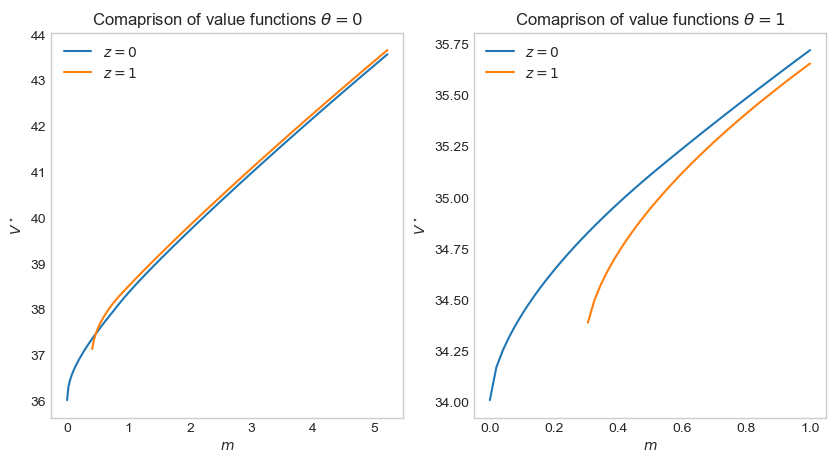

In [4]:
premium_index0 = np.where(par.grid_m[:] >= par.lambdaa_0)
premium_index1 = np.where(par.grid_m[:] >= par.lambdaa_1)


fig = plt.figure(figsize=(10,5))# figsize is in inches...
ax = fig.add_subplot(1,2,1)
ax.plot(par.grid_m[:80],sol.V[0,0,:80], label=r'$z=0$')
ax.plot(par.grid_m[premium_index0[0][0]:80],sol.V[1,0,premium_index0[0][0]:80], label=r'$z=1$')
ax.set_xlabel(f"$m$")
ax.set_ylabel(f"$V^\star$")
ax.set_title(r'Comaprison of value functions $\theta = 0$')
ax.grid(b=None)
ax.legend()
ax_right = fig.add_subplot(1,2,2)
ax_right.plot(par.grid_m[:50],sol.V[0,1,:50], label=r'$z=0$')
ax_right.plot(par.grid_m[premium_index1[0][0]:50],sol.V[1,1,premium_index1[0][0]:50], label=r'$z=1$')
ax_right.set_xlabel(f"$m$")
ax_right.set_ylabel(f"$V^\star$")
ax_right.set_title(r'Comaprison of value functions $\theta = 1$')
ax_right.grid(b=None)
plt.legend()
plt.savefig('value_functions.png') 
plt.show()

# 02) The benchmark regime: Given optimal HH choices, find optimal choice of insurance prices 

In a first, step the model has to be set up. Additionally, this cell allows to change the ranges for insurance premiums (called premium_0_grid and premium_1_grid) which determine the precision of the insurance company's search for the optimal prices to achieve a no-loss/no-gain balance. The cell below is commented out and would run the function "balance_matrix" from the "final_GE_heuristic" module. This means running the model once for each combination of premium_0_grid and premium_1_grid and simulating from it. Because each combination takes between 3-5 minutes to run, the resulting data was pre-computed and stored as csv files and  denoted as "..._dim10x10_benchmark". These files can be easily imported further down in this notebook to replicate the tables and figures just in the paper without the need to re-run everything.

In [23]:

# control number of runs
par.Npremium = 10

# create prmeium grid
premium_0_grid = np.linspace(0.3,0.8,par.Npremium)
premium_1_grid = np.linspace(0.3,0.8,par.Npremium)

# set mandate parameter to default
mandate = 0

In [9]:
#=============================================================================
# Solve, simulate ans save results for the benchmark regime 
#=============================================================================

# define regime used (benchmark or single_payer)
#regime = str('benchmark')

# calculate the matrices of various result variables with dim: (premium_0_grid.size,premium_1_grid.size)
#t0 = time.time() 
#results = final_GE_heuristic.balance_matrix(premium_0_grid, premium_1_grid, par, mandate, regime)
#t1 = time.time()
#print(f'time for for-loop with dimensions ({premium_0_grid.size,premium_1_grid.size}): {t1-t0:.8} seconds') # print the total time

# print time per iteration used for calculating results
#print((t1-t0)/(premium_0_grid.size*premium_1_grid.size))

# save the resulting matrices as csv to a specific folder in my personal directory (separate folder for each regime)
#final_GE_heuristic.save_alldfs_to_file(regime, results,premium_0_grid, premium_1_grid)
# The previous line is commented out as it will throw an error when execute outside of my personal folder structure.

Terminated because of sucessfull convergence for iteration = 70
Terminated because of sucessfull convergence of simulation for sim.it = 18
Current iteration ((0, 0)) with premium_0 = 0.3 | premium_1 = 0.3 
Terminated because of sucessfull convergence for iteration = 70
Terminated because of sucessfull convergence of simulation for sim.it = 30
Current iteration ((0, 1)) with premium_0 = 0.3 | premium_1 = 0.3555555555555555 
Terminated because of sucessfull convergence for iteration = 70
Terminated because of sucessfull convergence of simulation for sim.it = 26
Current iteration ((0, 2)) with premium_0 = 0.3 | premium_1 = 0.4111111111111111 
Terminated because of sucessfull convergence for iteration = 70
Terminated because of sucessfull convergence of simulation for sim.it = 33
Current iteration ((0, 3)) with premium_0 = 0.3 | premium_1 = 0.4666666666666667 
Terminated because of sucessfull convergence for iteration = 70
Terminated because of sucessfull convergence of simulation for sim.

## Load precomputed data 

As re-running the whole file will take significant time, the following cell provides the option to import the previously computed matrices from file. To work properly, this notebook will have to be stored in the same directory as the csv files.

In [24]:

#=============================================================================
# Import precomupted results from folder in same directory
#=============================================================================

path = 'balance_matrix_dim_{0}x{1}_{2}'.format(premium_0_grid.size, premium_0_grid.size, 'benchmark')
benchmark_balance_matrix = pd.read_csv('{0}.csv'.format(path))
benchmark_balance_matrix = benchmark_balance_matrix.set_index('Unnamed: 0') # set new row index 
benchmark_balance_matrix.index.names = ['premium theta = 0']
benchmark_balance_matrix.columns.names = ['premium theta = 1']

path = 'insrate_dim_{0}x{1}_{2}'.format(premium_0_grid.size, premium_0_grid.size, 'benchmark')
benchmark_insrate = pd.read_csv('{0}.csv'.format(path))
benchmark_insrate = benchmark_insrate.set_index('Unnamed: 0') # set new row index 
benchmark_insrate.index.names = ['premium theta = 0']
benchmark_insrate.columns.names = ['premium theta = 1']

path = 'insrate_theta0_dim_{0}x{1}_{2}'.format(premium_0_grid.size, premium_0_grid.size, 'benchmark')
benchmark_insrate_theta0 = pd.read_csv('{0}.csv'.format(path))
benchmark_insrate_theta0 = benchmark_insrate_theta0.set_index('Unnamed: 0')
benchmark_insrate_theta0.index.names = ['premium theta = 0']
benchmark_insrate_theta0.columns.names = ['premium theta = 1']
path = 'insrate_theta1_dim_{0}x{1}_{2}'.format(premium_0_grid.size, premium_0_grid.size, 'benchmark')
benchmark_insrate_theta1 = pd.read_csv('{0}.csv'.format(path))
benchmark_insrate_theta1 = benchmark_insrate_theta1.set_index('Unnamed: 0')
benchmark_insrate_theta1.index.names = ['premium theta = 0']
benchmark_insrate_theta1.columns.names = ['premium theta = 1']

path = 'consumption_z0_theta0_dim_{0}x{1}_{2}'.format(premium_0_grid.size, premium_0_grid.size, 'benchmark')
benchmark_consumption_z0_theta0 = pd.read_csv('{0}.csv'.format(path))
benchmark_consumption_z0_theta0 = benchmark_consumption_z0_theta0.set_index('Unnamed: 0')
benchmark_consumption_z0_theta0.index.names = ['premium theta = 0']
benchmark_consumption_z0_theta0.columns.names = ['premium theta = 1']
path = 'consumption_z0_theta1_dim_{0}x{1}_{2}'.format(premium_0_grid.size, premium_0_grid.size, 'benchmark')
benchmark_consumption_z0_theta1 = pd.read_csv('{0}.csv'.format(path))
benchmark_consumption_z0_theta1 = benchmark_consumption_z0_theta1.set_index('Unnamed: 0')
benchmark_consumption_z0_theta1.index.names = ['premium theta = 0']
benchmark_consumption_z0_theta1.columns.names = ['premium theta = 1']

path = 'consumption_z1_theta0_dim_{0}x{1}_{2}'.format(premium_0_grid.size, premium_0_grid.size, 'benchmark')
benchmark_consumption_z1_theta0 = pd.read_csv('{0}.csv'.format(path))
benchmark_consumption_z1_theta0 = benchmark_consumption_z1_theta0.set_index('Unnamed: 0')
benchmark_consumption_z1_theta0.index.names = ['premium theta = 0']
benchmark_consumption_z1_theta0.columns.names = ['premium theta = 1']
path = 'consumption_z1_theta1_dim_{0}x{1}_{2}'.format(premium_0_grid.size, premium_0_grid.size, 'benchmark')
benchmark_consumption_z1_theta1 = pd.read_csv('{0}.csv'.format(path))
benchmark_consumption_z1_theta1 = benchmark_consumption_z1_theta1.set_index('Unnamed: 0')
benchmark_consumption_z1_theta1.index.names = ['premium theta = 0']
benchmark_consumption_z1_theta1.columns.names = ['premium theta = 1']


## Calculate profit matrix

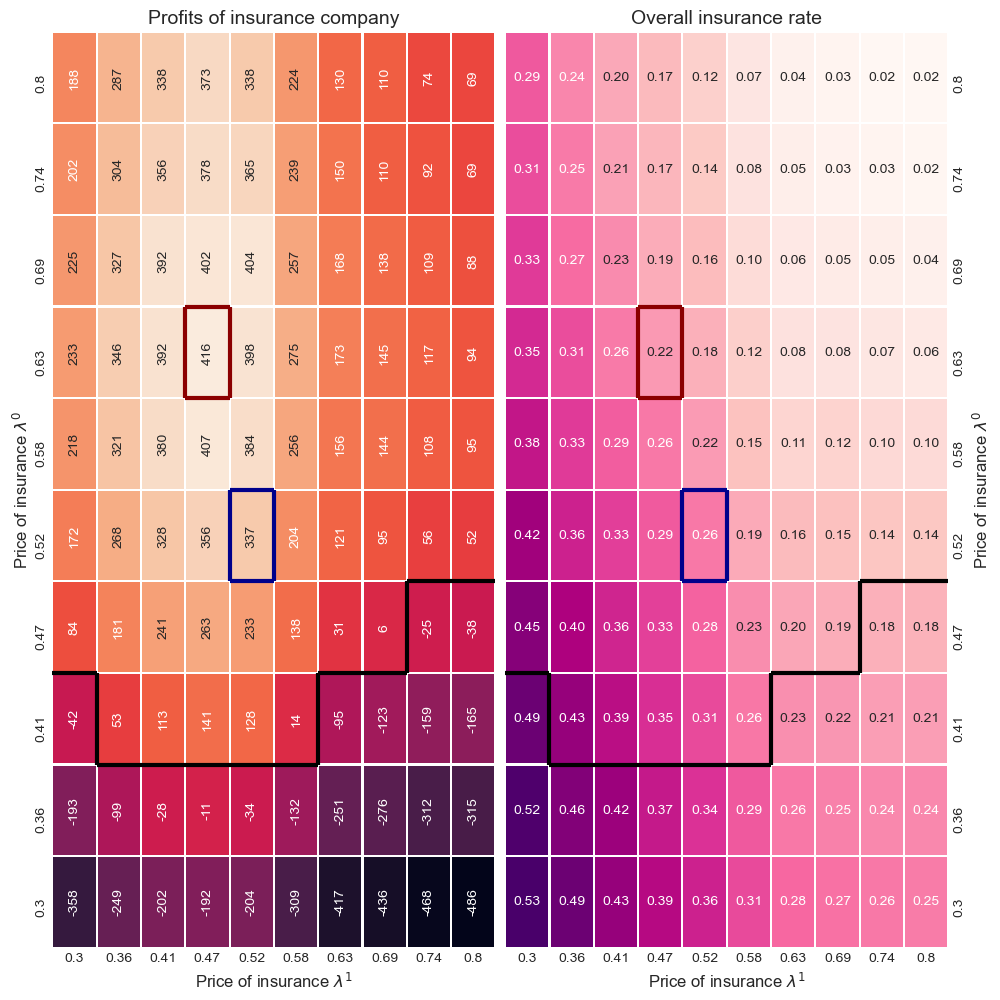

In [13]:
df =  pd.DataFrame(benchmark_balance_matrix)
df2 = pd.DataFrame(benchmark_insrate)

fig, (ax,ax2) = plt.subplots(figsize=(10,10),ncols=2)
fig.subplots_adjust(wspace=0.01)
sns.heatmap(df, cmap="rocket", ax=ax, cbar=False,  linewidth=0.8, annot=True, fmt='.0f',annot_kws={'rotation': 90})
#fig.colorbar(ax.collections[0], ax=ax, location="left", use_gridspec=False,shrink=0.5)#, pad=0.2)
sns.heatmap(df2, cmap="RdPu", ax=ax2, cbar=False, linewidth=0.8, annot=True, fmt='.2f')

ax.set_xlabel('Price of insurance $\lambda^1$', fontsize=12)
ax.set_ylabel('Price of insurance $\lambda^0$', fontsize=12)
ax.invert_yaxis()
ax.set_title('Profits of insurance company', fontsize=14)
ax.hlines(4,8,10, linestyle='solid', linewidth=3, color="black")
ax.hlines(3,6,8, linestyle='solid', linewidth=3, color="black")
ax.hlines(3,0,1, linestyle='solid', linewidth=3, color="black")
ax.hlines(2,1,6, linestyle='solid', linewidth=3, color="black")
ax.vlines(1,2,3, linestyle='solid', linewidth=3, color="black")
ax.vlines(6,2,3, linestyle='solid', linewidth=3, color="black")
ax.vlines(8,3,4, linestyle='solid', linewidth=3, color="black")

ax.vlines(3,6,7, linestyle='solid', linewidth=3, color="darkred")
ax.vlines(4,6,7, linestyle='solid', linewidth=3, color="darkred")
ax.vlines(4,4,5, linestyle='solid', linewidth=3, color="darkblue")
ax.vlines(5,4,5, linestyle='solid', linewidth=3, color="darkblue")
ax.hlines(6,3,4, linestyle='solid', linewidth=3, color="darkred")
ax.hlines(7,3,4, linestyle='solid', linewidth=3, color="darkred")
ax.hlines(4,4,5, linestyle='solid', linewidth=3, color="darkblue")
ax.hlines(5,4,5, linestyle='solid', linewidth=3, color="darkblue")

ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.set_title('Overall insurance rate', fontsize=14)
ax2.invert_yaxis()
ax2.set_xlabel('Price of insurance $\lambda^1$', fontsize=12)
ax2.set_ylabel('Price of insurance $\lambda^0$', fontsize=12)
ax2.hlines(4,8,10, linestyle='solid', linewidth=3, color="black")
ax2.hlines(3,6,8, linestyle='solid', linewidth=3, color="black")
ax2.hlines(3,0,1, linestyle='solid', linewidth=3, color="black")
ax2.hlines(2,1,6, linestyle='solid', linewidth=3, color="black")
ax2.vlines(1,2,3, linestyle='solid', linewidth=3, color="black")
ax2.vlines(6,2,3, linestyle='solid', linewidth=3, color="black")
ax2.vlines(8,3,4, linestyle='solid', linewidth=3, color="black")

ax2.vlines(3,6,7, linestyle='solid', linewidth=3, color="darkred")
ax2.vlines(4,6,7, linestyle='solid', linewidth=3, color="darkred")
ax2.vlines(4,4,5, linestyle='solid', linewidth=3, color="darkblue")
ax2.vlines(5,4,5, linestyle='solid', linewidth=3, color="darkblue")
ax2.hlines(6,3,4, linestyle='solid', linewidth=3, color="darkred")
ax2.hlines(7,3,4, linestyle='solid', linewidth=3, color="darkred")
ax2.hlines(4,4,5, linestyle='solid', linewidth=3, color="darkblue")
ax2.hlines(5,4,5, linestyle='solid', linewidth=3, color="darkblue")
plt.tight_layout(pad=0.7)
plt.savefig('seaborn_heatmap_balance_vs_insrate.png')  
plt.show()


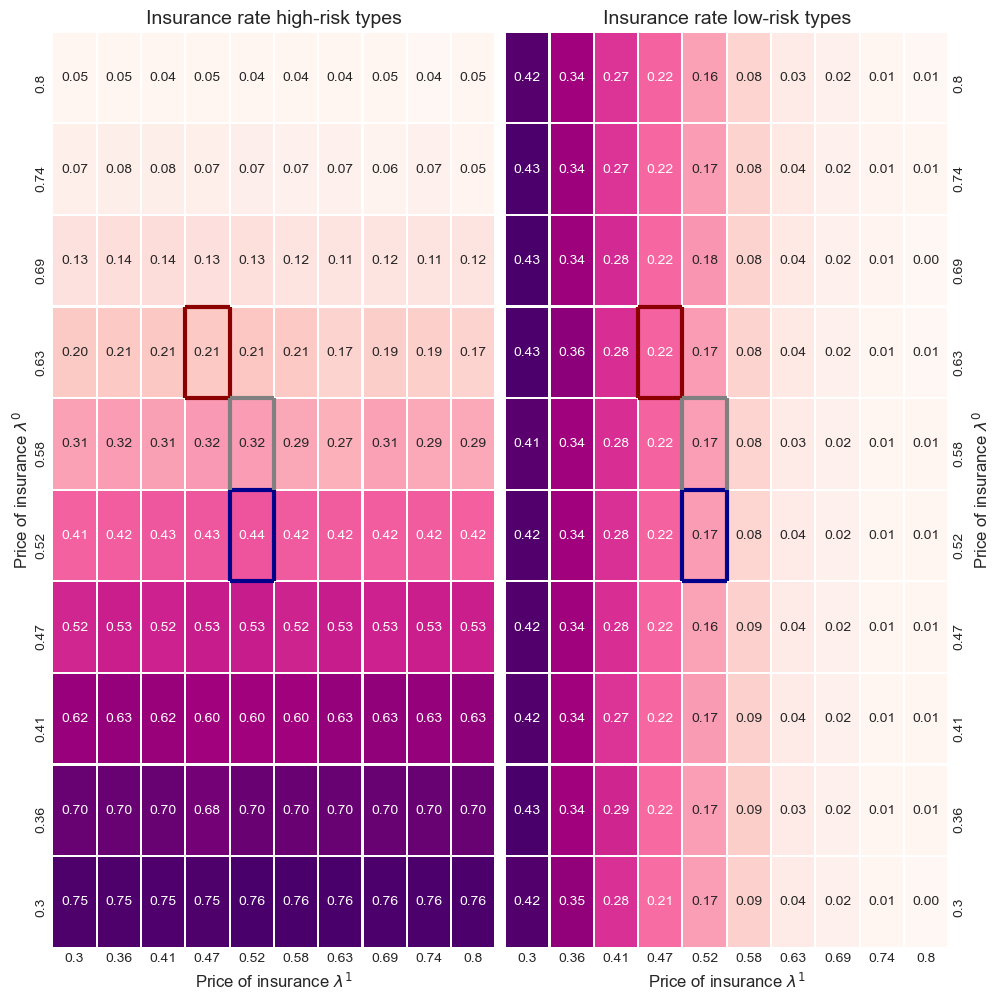

In [27]:
fig, (ax,ax2) = plt.subplots(figsize=(10,10),ncols=2)
fig.subplots_adjust(wspace=0.01)
sns.heatmap(benchmark_insrate_theta0, cmap="RdPu", ax=ax, cbar=False,  linewidth=0.8, annot=True, fmt='.2f')
sns.heatmap(benchmark_insrate_theta1, cmap="RdPu", ax=ax2, cbar=False, linewidth=0.8, annot=True, fmt='.2f')
ax.invert_yaxis()
ax.set_title('Insurance rate high-risk types', fontsize=14)
ax.set_xlabel('Price of insurance $\lambda^1$', fontsize=12)
ax.set_ylabel('Price of insurance $\lambda^0$', fontsize=12)

ax.vlines(3,6,7, linestyle='solid', linewidth=3, color="darkred")
ax.vlines(4,6,7, linestyle='solid', linewidth=3, color="darkred")
ax.vlines(4,4,5, linestyle='solid', linewidth=3, color="darkblue")
ax.vlines(5,4,5, linestyle='solid', linewidth=3, color="darkblue")
ax.hlines(6,3,4, linestyle='solid', linewidth=3, color="darkred")
ax.hlines(7,3,4, linestyle='solid', linewidth=3, color="darkred")
ax.hlines(4,4,5, linestyle='solid', linewidth=3, color="darkblue")
ax.hlines(5,4,5, linestyle='solid', linewidth=3, color="darkblue")
ax.hlines(6,4,5, linestyle='solid', linewidth=3, color="gray")
ax.vlines(4,5,6, linestyle='solid', linewidth=3, color="gray")
ax.vlines(5,5,6, linestyle='solid', linewidth=3, color="gray")

ax2.set_title('Insurance rate low-risk types', fontsize=14)
ax2.set_xlabel('Price of insurance $\lambda^1$', fontsize=12)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")
ax2.invert_yaxis()
ax2.set_ylabel('Price of insurance $\lambda^0$', fontsize=12)

ax2.vlines(3,6,7, linestyle='solid', linewidth=3, color="darkred")
ax2.vlines(4,6,7, linestyle='solid', linewidth=3, color="darkred")
ax2.vlines(4,4,5, linestyle='solid', linewidth=3, color="darkblue")
ax2.vlines(5,4,5, linestyle='solid', linewidth=3, color="darkblue")
ax2.hlines(6,3,4, linestyle='solid', linewidth=3, color="darkred")
ax2.hlines(7,3,4, linestyle='solid', linewidth=3, color="darkred")
ax2.hlines(4,4,5, linestyle='solid', linewidth=3, color="darkblue")
ax2.hlines(5,4,5, linestyle='solid', linewidth=3, color="darkblue")
ax2.hlines(6,4,5, linestyle='solid', linewidth=3, color="gray")
ax2.vlines(4,5,6, linestyle='solid', linewidth=3, color="gray")
ax2.vlines(5,5,6, linestyle='solid', linewidth=3, color="gray")
plt.tight_layout(pad=0.7)
plt.savefig('seaborn_heatmap_insrate_by_type.png') 
plt.show()

## Calculate type specific price elasticity

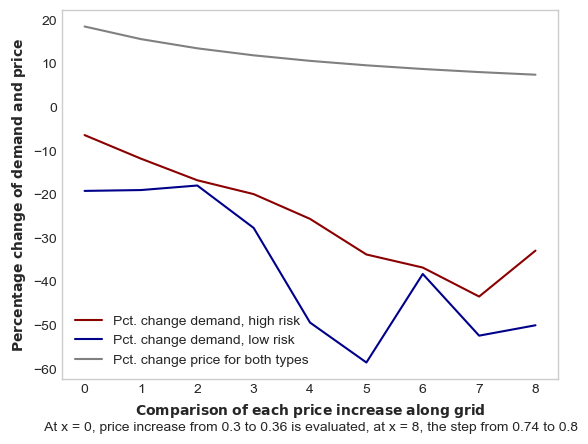

In [86]:
# elasticity for high risk type
vec_colum = pd.DataFrame(benchmark_insrate_theta0)['0.3'].to_numpy() # get column vector for first column of right panel of figure above
pct_change_demand_0 = np.diff(vec_colum) / vec_colum[:-1] * 100.
pct_change_price_0 = np.diff(premium_0_grid) / premium_0_grid[:-1] * 100.
# if price changed by 1 \%, demand would change by ? \%:
elasticity_0 = pct_change_demand_0/pct_change_price_0

# elasticity for low risk type
vec_colum = pd.DataFrame(benchmark_insrate_theta1).iloc[-1].to_numpy() # get column vector for first column of right panel of figure above
pct_change_demand_1 = np.diff(vec_colum) / vec_colum[:-1] * 100.
pct_change_price_1 = np.diff(premium_1_grid) / premium_1_grid[:-1] * 100.
# if price changed by 1 \%, demand would change by ? \%:
elasticity_1 = pct_change_demand_1/pct_change_price_1
elasticity_1
           
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(pct_change_demand_0,label=('Pct. change demand, high risk'), color = 'darkred')
ax.plot(pct_change_demand_1,label=('Pct. change demand, low risk'), color = 'darkblue')
ax.plot(pct_change_price_1,label=('Pct. change price for both types'), color = 'gray')
ax.legend(loc=0)
ax.grid(b=None)
ax.set_xlabel(r"$\bf{Comparison \; of \; each \; price \; increase \; along \; grid}$" + "\n At x = 0, price increase from 0.3 to 0.36 is evaluated, at x = 8, the step from 0.74 to 0.8")
ax.set_ylabel(r"$\bf{Percentage \; change \; of \; demand \; and \; price}$")
plt.savefig('benchmark_demand_vs_price.png')
plt.show()

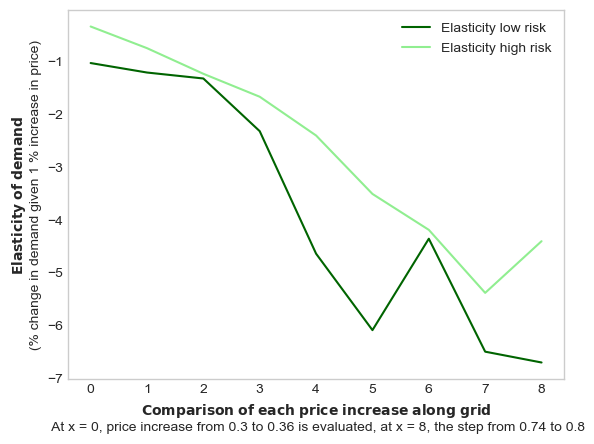

In [87]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(elasticity_1,label=('Elasticity low risk'), color = 'darkgreen')
ax.plot(elasticity_0,label=('Elasticity high risk'), color = 'lightgreen')
ax.legend(loc=0)
ax.grid(b=None)
ax.set_xlabel(r"$\bf{Comparison \; of \; each \; price \; increase \; along \; grid}$" + "\n At x = 0, price increase from 0.3 to 0.36 is evaluated, at x = 8, the step from 0.74 to 0.8")
ax.set_ylabel(r"$\bf{Elasticity \; of \; demand}$" + "\n (% change in demand given 1 % increase in price) ") 
plt.savefig('benchmark_price_elsaticty.png')
plt.show()

## Perfect competition

/Users/maltekemeter/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


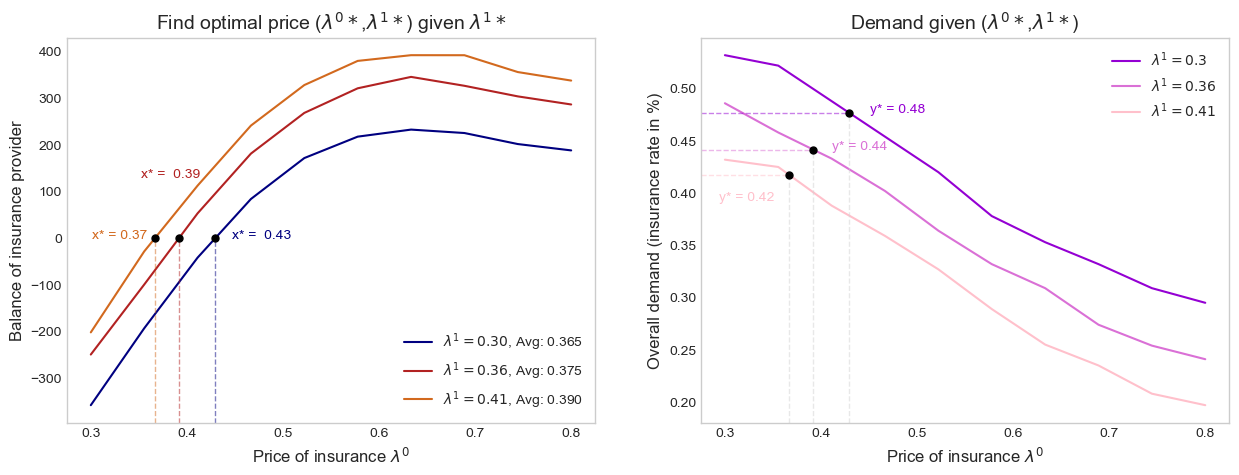

In [14]:
x = premium_0_grid
column_1_data = benchmark_balance_matrix['0.3'].to_numpy()
column_1_insdata = benchmark_insrate['0.3'].to_numpy()

column_2_data = benchmark_balance_matrix['0.36'].to_numpy()
column_2_insdata = benchmark_insrate['0.36'].to_numpy()

column_3_data = benchmark_balance_matrix['0.41'].to_numpy()
column_3_insdata = benchmark_insrate['0.41'].to_numpy()

f_col1 = interpolate.interp1d(x,column_1_data)
f_col2 = interpolate.interp1d(x,column_2_data)
f_col3 = interpolate.interp1d(x,column_3_data)
i_col1 = interpolate.interp1d(x,column_1_insdata)
i_col2 = interpolate.interp1d(x,column_2_insdata)
i_col3 = interpolate.interp1d(x,column_3_insdata)

optimal_p_col1 = fsolve(f_col1, 0.4)
optimal_p_col2 = fsolve(f_col2, 0.4)
optimal_p_col3 = fsolve(f_col3, 0.4)

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
ax.plot(x,column_1_data, color = 'navy', label=r'$\lambda^1=0.30$, Avg: 0.365')
ax.plot(x,column_2_data, color = 'firebrick', label=r'$\lambda^1=0.36$, Avg: 0.375')
ax.plot(x,column_3_data, color = 'chocolate', label=r'$\lambda^1=0.41$, Avg: 0.390')
ax.grid(b=None)
ax.set_title(r'Find optimal price ($\lambda^0*$,$\lambda^1*$) given $\lambda^1*$', fontsize=14)
ax.set_xlabel('Price of insurance $\lambda^0$', fontsize=12)
ax.set_ylabel('Balance of insurance provider', fontsize=12)
ax.axvline(optimal_p_col1, 0, 0.49, color='navy', linewidth=1, linestyle='dashed', alpha = 0.5)
ax.axvline(optimal_p_col2, 0, 0.49, color='firebrick', linewidth=1, linestyle='dashed', alpha = 0.5)
ax.axvline(optimal_p_col3, 0, 0.49, color='chocolate', linewidth=1, linestyle='dashed', alpha = 0.5)
ax.plot(optimal_p_col1, 0,'o',color='black', markersize=5)
ax.plot(optimal_p_col3, 0,'o',color='black', markersize=5)
ax.plot(optimal_p_col2, 0,'o',color='black', markersize=5)
ax.text(optimal_p_col3*0.82, 0 , 'x* = {:.2f}'.format(optimal_p_col3[0]), color='chocolate')
ax.text(optimal_p_col2*0.9,130 , 'x* =  {:.2f}'.format(optimal_p_col2[0]), color='firebrick')
ax.text(optimal_p_col1*1.04, 0 , 'x* =  {:.2f}'.format(optimal_p_col1[0]), color='navy')
ax.legend(loc=4)
ax2 = fig.add_subplot(1,2,2)
ax2.plot(x,column_1_insdata, color = 'darkviolet', label=r'$\lambda^1=0.30$')
ax2.plot(x,column_2_insdata, color = 'orchid', label=r'$\lambda^1=0.36$')
ax2.plot(x,column_3_insdata, color = 'pink', label=r'$\lambda^1=0.41$')
ax2.axhline(i_col1(optimal_p_col1),0, 0.28, color='darkviolet', linewidth=1, linestyle='dashed', alpha = 0.5)
ax2.axhline(i_col2(optimal_p_col2),0, 0.21, color='orchid', linewidth=1, linestyle='dashed', alpha = 0.5)
ax2.axhline(i_col3(optimal_p_col3),0, 0.16, color='pink', linewidth=1, linestyle='dashed', alpha = 0.5)
ax2.axvline(optimal_p_col1, 0, 0.8, color='lightgray', linewidth=1, linestyle='dashed', alpha = 0.5)
ax2.axvline(optimal_p_col2, 0, 0.7, color='lightgray', linewidth=1, linestyle='dashed', alpha = 0.5)
ax2.axvline(optimal_p_col3, 0, 0.65, color='lightgray', linewidth=1, linestyle='dashed', alpha = 0.5)
ax2.plot(optimal_p_col1, i_col1(optimal_p_col1),'o', color='black', markersize=5)
ax2.plot(optimal_p_col2, i_col2(optimal_p_col2),'o', color='black', markersize=5)
ax2.plot(optimal_p_col3, i_col3(optimal_p_col3),'o', color='black', markersize=5)
ax2.text(optimal_p_col1*1.05, i_col1(optimal_p_col1)*1, 'y* = {:.2f}'.format(i_col1(optimal_p_col1)[0]), color = 'darkviolet')
ax2.text(optimal_p_col2*1.05, i_col2(optimal_p_col2)*1, 'y* = {:.2f}'.format(i_col2(optimal_p_col2)[0]), color = 'orchid')
ax2.text(optimal_p_col3*0.8, i_col3(optimal_p_col3)*0.94, 'y* = {:.2f}'.format(i_col3(optimal_p_col3)[0]), color = 'pink')
ax2.grid(b=None)
ax2.set_title(r'Demand given ($\lambda^0*$,$\lambda^1*$)', fontsize=14)
ax2.set_xlabel('Price of insurance $\lambda^0$', fontsize=12)
ax2.set_ylabel('Overall demand (insurance rate in %)', fontsize=12)
ax2.legend()
plt.savefig('desirable_optima.png') 
plt.show()

## No price discrimination optimum

/Users/maltekemeter/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


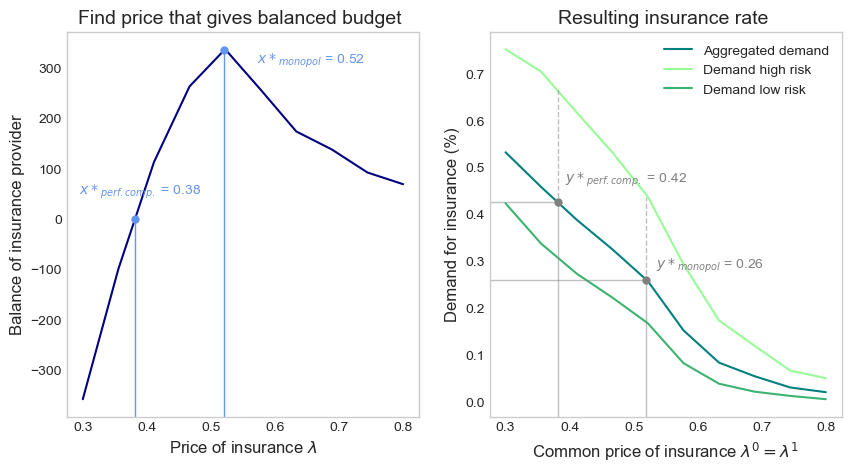

In [104]:
x = premium_0_grid
y = np.diag(benchmark_balance_matrix) 
z = np.diag(benchmark_insrate)
z_0 = np.diag(benchmark_insrate_theta0)
z_1 = np.diag(benchmark_insrate_theta1)
f = interpolate.interp1d(x, y)
ifun = interpolate.interp1d(x, z)
optimal_p = fsolve(f, 0.3)  #0.0 is the starting point

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,2,1)

ax.plot(x,y, color = 'navy')
ax.grid(b=None)
ax.set_title('Find price that gives balanced budget ', fontsize=14)
ax.set_xlabel(r'Price of insurance $\lambda$', fontsize=12)
ax.set_ylabel('Balance of insurance provider', fontsize=12)
ax.axvline(optimal_p, 0, 0.51, color='cornflowerblue', linewidth=1)
ax.plot(optimal_p, 0,'o',color='cornflowerblue', markersize=5)
ax.plot(0.52, 334,'o',color='cornflowerblue', markersize=5)
#ax.axhline(0, 0, 0.18, color='cornflowerblue', linewidth=1)
ax.axvline(0.52, 0, 0.95, color='cornflowerblue', linewidth=1)
ax.text(optimal_p*0.77, 50 , '$x*_{perf. comp.}$ = 0.38', color = 'cornflowerblue')
ax.text(0.52*1.1, 310 , '$x*_{monopol}$ = 0.52', color = 'cornflowerblue')

ax2 = fig.add_subplot(1,2,2)
ax2.plot(x,z,color = 'teal',label='Aggregated demand')
ax2.plot(x,z_0,color = 'palegreen',label='Demand high risk')
ax2.plot(x,z_1,color = 'mediumseagreen',label='Demand low risk')
ax2.grid(b=None)
ax2.set_title('Resulting insurance rate ', fontsize=14)
ax2.set_xlabel(r'Common price of insurance $\lambda^0 = \lambda^1 $', fontsize=12)
ax2.set_ylabel('Demand for insurance (%)', fontsize=12)
ax2.axvline(optimal_p,0, 0.55, color='gray', linewidth=1, alpha = 0.5)
ax2.axvline(0.52,0, 0.35, color='gray', linewidth=1, alpha = 0.5)
ax2.axvline(optimal_p,0.55, 0.85, color='gray', linewidth=1, alpha = 0.5, linestyle ='dashed')
ax2.axvline(0.52,0.35, 0.57, color='gray', linewidth=1, alpha = 0.5, linestyle ='dashed')
ax2.axhline(ifun(optimal_p),0, 0.18, color='gray', linewidth=1, alpha = 0.5)
ax2.axhline(ifun(0.52),0, 0.45, color='gray', linewidth=1, alpha = 0.5)
ax2.plot(optimal_p, ifun(optimal_p),'o', color='gray', markersize=5)
ax2.plot(0.52, ifun(0.52),'o', color='gray', markersize=5)
ax2.text(np.mean(optimal_p)*1.03, ifun(optimal_p)*1.1, '$y*_{perf. comp.}$ = 0.42', color = 'gray')
ax2.text(0.52*1.03, ifun(0.52)*1.1, '$y*_{monopol}$ = 0.26', color = 'gray')
ax2.legend()
plt.savefig('no_discriminiation_optima.png') 
plt.show()

# 03) Reform I: Introducing the ACA individual mandate

For the results from section 4.2 in the paper, the whole analysis is repeated after re-computing the data and setting the parameter "mandate" = 0.1. To safe time, this is done on a 7x7 matrix, so 49 runs instead of 100. Again, the cell that actually computes the data is commented out but the csv files denoted as e.g. "..._dim7x7_ACA_mandate" can be imported further below.

In [15]:
regime = str('ACA_mandate')

# control number of runs
par.Npremium = 7

# create prmeium grid
premium_0_grid = np.linspace(0.3,0.8,10)[:7]
premium_1_grid = np.linspace(0.3,0.8,10)[:7]

In [17]:
#=============================================================================
# Solve, simulate ans save results after reform 
#=============================================================================

# Set exogenous value for penalty of not taking insurance
#mandate = 0.1 # key question here is how to parametrize mandate 

# Calculate the premium decision matrix again
#results_ACA = final_GE_heuristic.balance_matrix(premium_0_grid, premium_1_grid, par, mandate, regime)

# adjust filenames to correct regime and save in separate folder
#final_GE_heuristic.save_alldfs_to_file(regime, results_ACA,premium_0_grid, premium_1_grid)

Terminated because of sucessfull convergence for iteration = 70
Terminated because of sucessfull convergence of simulation for sim.it = 18
Current iteration ((0, 0)) with premium_0 = 0.3 | premium_1 = 0.3 
Terminated because of sucessfull convergence for iteration = 70
Terminated because of sucessfull convergence of simulation for sim.it = 19
Current iteration ((0, 1)) with premium_0 = 0.3 | premium_1 = 0.3555555555555555 
Terminated because of sucessfull convergence for iteration = 70
Terminated because of sucessfull convergence of simulation for sim.it = 18
Current iteration ((0, 2)) with premium_0 = 0.3 | premium_1 = 0.4111111111111111 
Terminated because of sucessfull convergence for iteration = 70
Terminated because of sucessfull convergence of simulation for sim.it = 22
Current iteration ((0, 3)) with premium_0 = 0.3 | premium_1 = 0.4666666666666667 
Terminated because of sucessfull convergence for iteration = 72
Terminated because of sucessfull convergence of simulation for sim.

## Again, load precomputed data

In [17]:
#=============================================================================
# To save time, import precomupted results from folder in same directory
#=============================================================================

path = 'balance_matrix_dim_{0}x{1}_{2}'.format(premium_0_grid.size, premium_0_grid.size, 'ACA_mandate')
ACA_balance_matrix = pd.read_csv('{0}.csv'.format(path))
ACA_balance_matrix = ACA_balance_matrix.set_index('Unnamed: 0') # set new row index 
ACA_balance_matrix.index.names = ['premium theta = 0']
ACA_balance_matrix.columns.names = ['premium theta = 1']

path = 'insrate_dim_{0}x{1}_{2}'.format(premium_0_grid.size, premium_0_grid.size, 'ACA_mandate')
ACA_insrate = pd.read_csv('{0}.csv'.format(path))
ACA_insrate = ACA_insrate.set_index('Unnamed: 0') # set new row index 
ACA_insrate.index.names = ['premium theta = 0']
ACA_insrate.columns.names = ['premium theta = 1']

path = 'insrate_theta0_dim_{0}x{1}_{2}'.format(premium_0_grid.size, premium_0_grid.size, 'ACA_mandate')
ACA_insrate_theta0 = pd.read_csv('{0}.csv'.format(path))
ACA_insrate_theta0 = ACA_insrate_theta0.set_index('Unnamed: 0')
ACA_insrate_theta0.index.names = ['premium theta = 0']
ACA_insrate_theta0.columns.names = ['premium theta = 1']

path = 'insrate_theta1_dim_{0}x{1}_{2}'.format(premium_0_grid.size, premium_0_grid.size, 'ACA_mandate')
ACA_insrate_theta1 = pd.read_csv('{0}.csv'.format(path))
ACA_insrate_theta1 = ACA_insrate_theta1.set_index('Unnamed: 0')
ACA_insrate_theta1.index.names = ['premium theta = 0']
ACA_insrate_theta1.columns.names = ['premium theta = 1']

## Again, calculate profit matrix

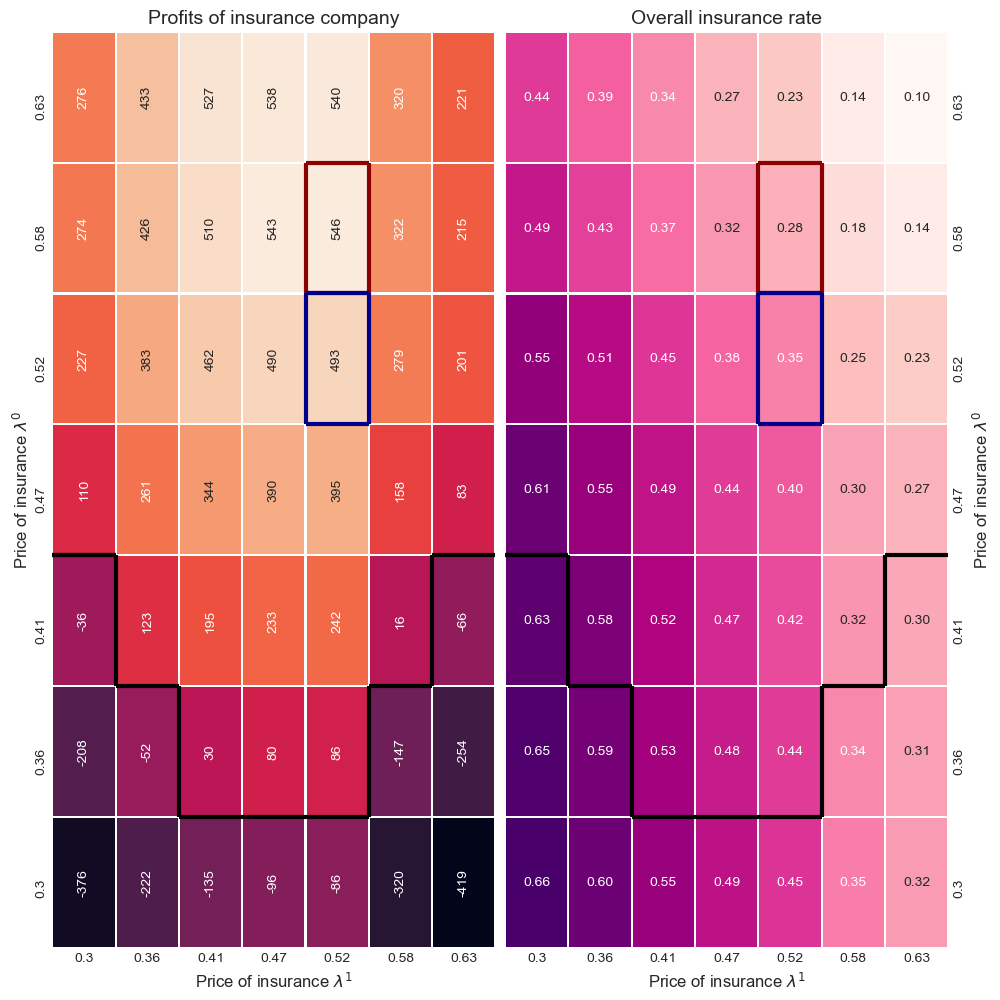

In [21]:
df =  pd.DataFrame(ACA_balance_matrix)
df2 = pd.DataFrame(ACA_insrate)

fig, (ax,ax2) = plt.subplots(figsize=(10,10),ncols=2)
fig.subplots_adjust(wspace=0.01)
sns.heatmap(df, cmap="rocket", ax=ax, cbar=False,  linewidth=0.8, annot=True, fmt='.0f',annot_kws={'rotation': 90})
sns.heatmap(df2, cmap="RdPu", ax=ax2, cbar=False, linewidth=0.8, annot=True, fmt='.2f')
ax.set_xlabel('Price of insurance $\lambda^1$', fontsize=12)
ax.set_ylabel('Price of insurance $\lambda^0$', fontsize=12)
ax.invert_yaxis()
ax.set_title('Profits of insurance company', fontsize=14)
ax.hlines(2,1,2, linestyle='solid', linewidth=3, color="black")
ax.hlines(3,0,1, linestyle='solid', linewidth=3, color="black")
ax.hlines(3,0,1, linestyle='solid', linewidth=3, color="black")
ax.vlines(1,2,3, linestyle='solid', linewidth=3, color="black")
ax.vlines(2,1,2, linestyle='solid', linewidth=3, color="black")
ax.vlines(5,1,2, linestyle='solid', linewidth=3, color="black")
ax.hlines(3,6,7, linestyle='solid', linewidth=3, color="black")
ax.hlines(2,5,6, linestyle='solid', linewidth=3, color="black")
ax.hlines(1,2,5, linestyle='solid', linewidth=3, color="black")
ax.vlines(6,2,3, linestyle='solid', linewidth=3, color="black")

ax.vlines(4,5,6, linestyle='solid', linewidth=3, color="darkred")
ax.vlines(5,5,6, linestyle='solid', linewidth=3, color="darkred")
ax.vlines(4,4,5, linestyle='solid', linewidth=3, color="darkblue")
ax.vlines(5,4,5, linestyle='solid', linewidth=3, color="darkblue")
ax.hlines(5,4,5, linestyle='solid', linewidth=3, color="darkred")
ax.hlines(6,4,5, linestyle='solid', linewidth=3, color="darkred")
ax.hlines(4,4,5, linestyle='solid', linewidth=3, color="darkblue")
ax.hlines(5,4,5, linestyle='solid', linewidth=3, color="darkblue")

ax2.yaxis.tick_right()
ax2.set_title('Overall insurance rate', fontsize=14)
ax2.yaxis.set_label_position("right")
ax2.invert_yaxis()
ax2.set_ylabel('Price of insurance $\lambda^0$', fontsize=12)
ax2.set_xlabel('Price of insurance $\lambda^1$', fontsize=12)
ax2.hlines(2,1,2, linestyle='solid', linewidth=3, color="black")
ax2.hlines(3,0,1, linestyle='solid', linewidth=3, color="black")
ax2.hlines(3,0,1, linestyle='solid', linewidth=3, color="black")
ax2.vlines(1,2,3, linestyle='solid', linewidth=3, color="black")
ax2.vlines(2,1,2, linestyle='solid', linewidth=3, color="black")
ax2.vlines(5,1,2, linestyle='solid', linewidth=3, color="black")
ax2.hlines(3,6,7, linestyle='solid', linewidth=3, color="black")
ax2.hlines(2,5,6, linestyle='solid', linewidth=3, color="black")
ax2.hlines(1,2,5, linestyle='solid', linewidth=3, color="black")
ax2.vlines(6,2,3, linestyle='solid', linewidth=3, color="black")

ax2.vlines(4,5,6, linestyle='solid', linewidth=3, color="darkred")
ax2.vlines(5,5,6, linestyle='solid', linewidth=3, color="darkred")
ax2.vlines(4,4,5, linestyle='solid', linewidth=3, color="darkblue")
ax2.vlines(5,4,5, linestyle='solid', linewidth=3, color="darkblue")
ax2.hlines(5,4,5, linestyle='solid', linewidth=3, color="darkred")
ax2.hlines(6,4,5, linestyle='solid', linewidth=3, color="darkred")
ax2.hlines(4,4,5, linestyle='solid', linewidth=3, color="darkblue")
ax2.hlines(5,4,5, linestyle='solid', linewidth=3, color="darkblue")
plt.tight_layout(pad=0.7)
plt.savefig('ACA_0.1_heatmap_balance_vs_insrate.png')  
plt.show()

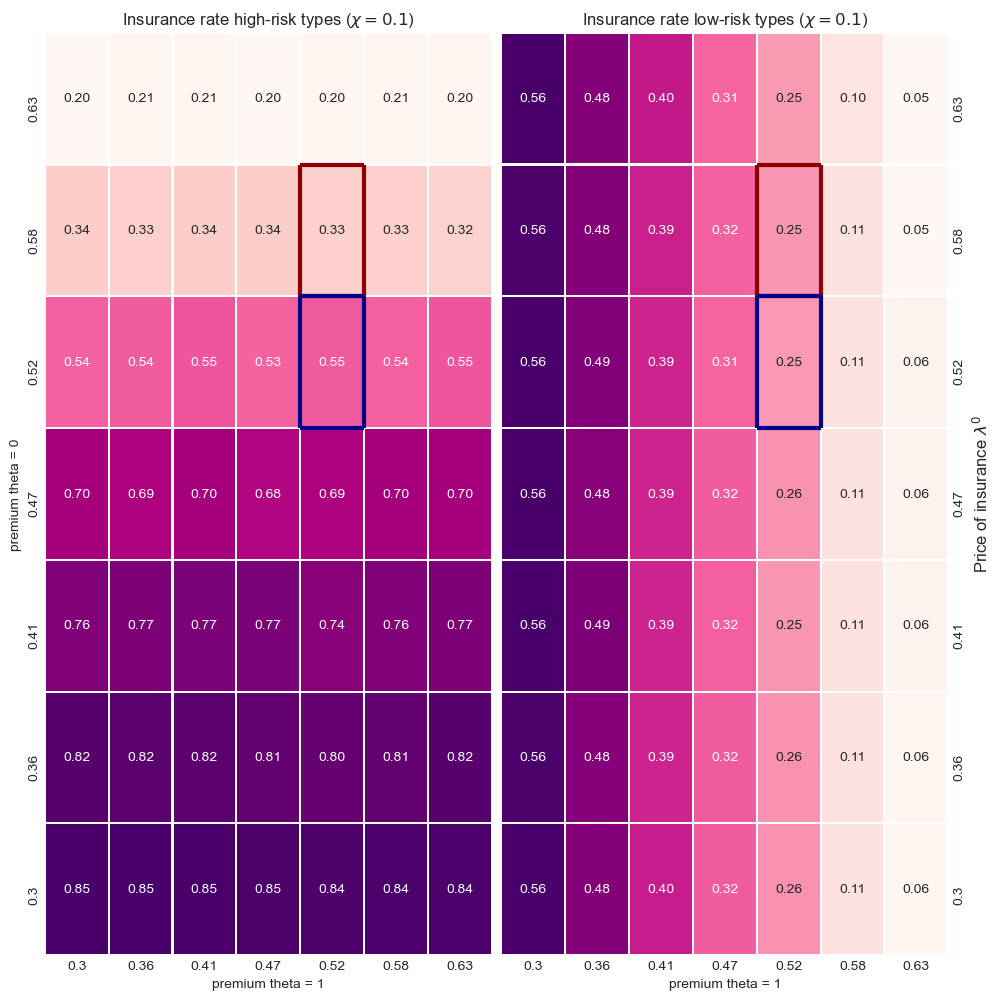

In [22]:
df =  pd.DataFrame(ACA_insrate_theta0)
df2 = pd.DataFrame(ACA_insrate_theta1)

fig, (ax,ax2) = plt.subplots(figsize=(10,10),ncols=2)
fig.subplots_adjust(wspace=0.01)
sns.heatmap(df, cmap="RdPu", ax=ax, cbar=False,  linewidth=0.8, annot=True, fmt='.2f')
sns.heatmap(df2, cmap="RdPu", ax=ax2, cbar=False, linewidth=0.8, annot=True, fmt='.2f')
ax.invert_yaxis()
ax.vlines(4,5,6, linestyle='solid', linewidth=3, color="darkred")
ax.vlines(5,5,6, linestyle='solid', linewidth=3, color="darkred")
ax.vlines(4,4,5, linestyle='solid', linewidth=3, color="darkblue")
ax.vlines(5,4,5, linestyle='solid', linewidth=3, color="darkblue")
ax.hlines(5,4,5, linestyle='solid', linewidth=3, color="darkred")
ax.hlines(6,4,5, linestyle='solid', linewidth=3, color="darkred")
ax.hlines(4,4,5, linestyle='solid', linewidth=3, color="darkblue")
ax.hlines(5,4,5, linestyle='solid', linewidth=3, color="darkblue")
ax.set_title('Insurance rate high-risk types ($\chi =0.1$)')

ax2.set_title('Insurance rate low-risk types ($\chi =0.1$)')
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
ax2.invert_yaxis()
ax2.set_ylabel('Price of insurance $\lambda^0$', fontsize=12)
ax2.vlines(4,5,6, linestyle='solid', linewidth=3, color="darkred")
ax2.vlines(5,5,6, linestyle='solid', linewidth=3, color="darkred")
ax2.vlines(4,4,5, linestyle='solid', linewidth=3, color="darkblue")
ax2.vlines(5,4,5, linestyle='solid', linewidth=3, color="darkblue")
ax2.hlines(5,4,5, linestyle='solid', linewidth=3, color="darkred")
ax2.hlines(6,4,5, linestyle='solid', linewidth=3, color="darkred")
ax2.hlines(4,4,5, linestyle='solid', linewidth=3, color="darkblue")
ax2.hlines(5,4,5, linestyle='solid', linewidth=3, color="darkblue")
plt.tight_layout(pad=0.7)
plt.savefig('ACA_0.1_heatmap_insrate_by_type.png') 
plt.show()

## Again, calculate price elasticities

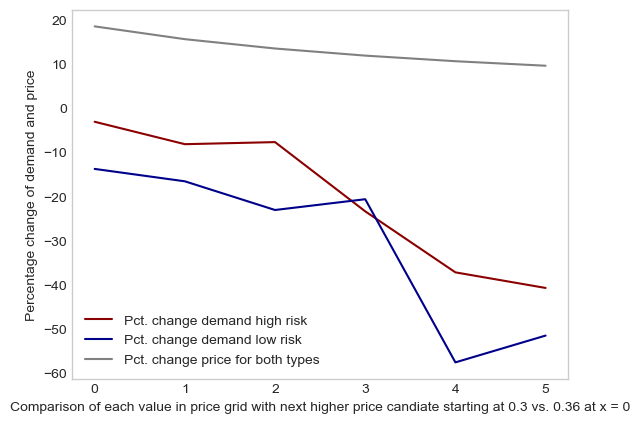

In [80]:
# elasticity for high risk type
vec_colum = pd.DataFrame(ACA_insrate_theta0)['0.3'].to_numpy() # get column vector for first column of right panel of figure above
pct_change_demand_0 = np.diff(vec_colum) / vec_colum[:-1] * 100.
pct_change_price_0 = np.diff(premium_0_grid) / premium_0_grid[:-1] * 100.
# if price changed by 1 \%, demand would change by ? \%:
ACA_elasticity_0 = pct_change_demand_0/pct_change_price_0

# elasticity for low risk type
vec_colum = pd.DataFrame(ACA_insrate_theta1).iloc[-1].to_numpy() # get column vector for first column of right panel of figure above
pct_change_demand_1 = np.diff(vec_colum) / vec_colum[:-1] * 100.
pct_change_price_1 = np.diff(premium_1_grid) / premium_1_grid[:-1] * 100.
# if price changed by 1 \%, demand would change by ? \%:
ACA_elasticity_1 = pct_change_demand_1/pct_change_price_1
           
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(pct_change_demand_0,label=('Pct. change demand high risk'), color = 'darkred')
ax.plot(pct_change_demand_1,label=('Pct. change demand low risk'), color = 'darkblue')
ax.plot(pct_change_price_1,label=('Pct. change price for both types'), color = 'gray')
ax.legend(loc=0)
ax.grid(b=None)
ax.set_xlabel(r"Comparison of each value in price grid with next higher price candiate starting at 0.3 vs. 0.36 at x = 0")
ax.set_ylabel('Percentage change of demand and price')
plt.savefig('ACA_demand_vs_price.png')
plt.show()

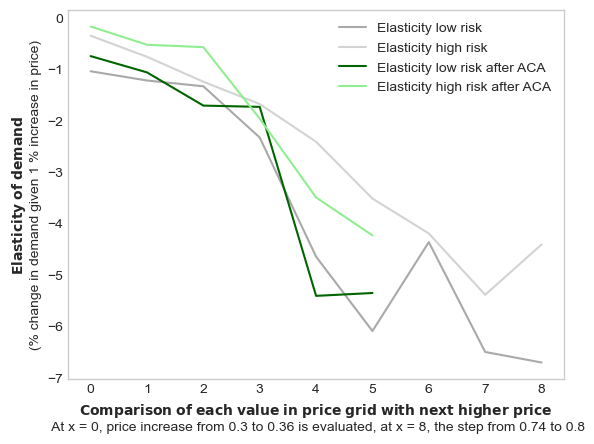

In [81]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(elasticity_1,label=('Elasticity low risk'), color = 'darkgray')
ax.plot(elasticity_0,label=('Elasticity high risk'), color = 'lightgray')
ax.plot(ACA_elasticity_1,label=('Elasticity low risk after ACA'), color = 'darkgreen')
ax.plot(ACA_elasticity_0,label=('Elasticity high risk after ACA'), color = 'lightgreen')
ax.legend(loc=0)
ax.grid(b=None)
ax.set_xlabel(r"$\bf{Comparison \; of \; each \; value \; in \; price \; grid  \; with  \; next  \; higher  \; price}$" + "\n At x = 0, price increase from 0.3 to 0.36 is evaluated, at x = 8, the step from 0.74 to 0.8")
ax.set_ylabel(r"$\bf{Elasticity \; of \; demand}$" + "\n (% change in demand given 1 % increase in price) ") 
plt.savefig('ACA_price_elsaticty.png')
plt.show()

## Again, introduce perfect competition

/Users/maltekemeter/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


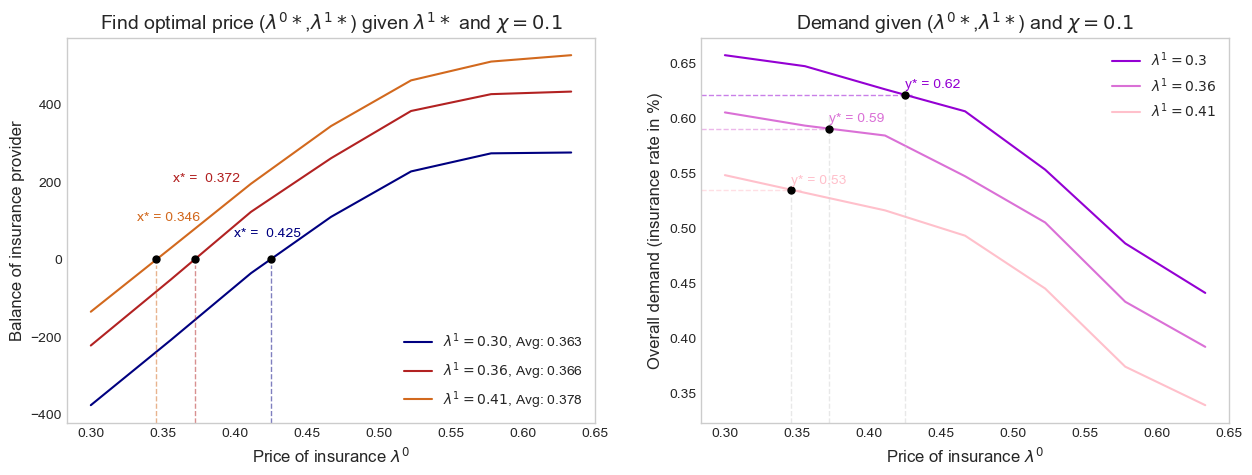

In [24]:
x = premium_0_grid
column_1_data = ACA_balance_matrix['0.3'].to_numpy()
column_1_insdata = ACA_insrate['0.3'].to_numpy()

column_2_data = ACA_balance_matrix['0.36'].to_numpy()
column_2_insdata = ACA_insrate['0.36'].to_numpy()

column_3_data = ACA_balance_matrix['0.41'].to_numpy()
column_3_insdata = ACA_insrate['0.41'].to_numpy()

f_col1 = interpolate.interp1d(x,column_1_data)
f_col2 = interpolate.interp1d(x,column_2_data)
f_col3 = interpolate.interp1d(x,column_3_data)
i_col1 = interpolate.interp1d(x,column_1_insdata)
i_col2 = interpolate.interp1d(x,column_2_insdata)
i_col3 = interpolate.interp1d(x,column_3_insdata)

optimal_p_col1 = fsolve(f_col1, 0.4)
optimal_p_col2 = fsolve(f_col2, 0.4)
optimal_p_col3 = fsolve(f_col3, 0.4)

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(1,2,1)
ax.plot(x,column_1_data, color = 'navy', label=r'$\lambda^1=0.30$, Avg: 0.363')
ax.plot(x,column_2_data, color = 'firebrick', label=r'$\lambda^1=0.36$, Avg: 0.366')
ax.plot(x,column_3_data, color = 'chocolate', label=r'$\lambda^1=0.41$, Avg: 0.378')
ax.grid(b=None)
ax.set_title(r'Find optimal price ($\lambda^0*$,$\lambda^1*$) given $\lambda^1*$ and $\chi=0.1$', fontsize=14)
ax.set_xlabel('Price of insurance $\lambda^0$', fontsize=12)
ax.set_ylabel('Balance of insurance provider', fontsize=12)
ax.axvline(optimal_p_col1, 0, 0.41, color='navy', linewidth=1, linestyle='dashed', alpha = 0.5)
ax.axvline(optimal_p_col2, 0, 0.41, color='firebrick', linewidth=1, linestyle='dashed', alpha = 0.5)
ax.axvline(optimal_p_col3, 0, 0.41, color='chocolate', linewidth=1, linestyle='dashed', alpha = 0.5)
ax.plot(optimal_p_col1, 0,'o',color='black', markersize=5)
ax.plot(optimal_p_col3, 0,'o',color='black', markersize=5)
ax.plot(optimal_p_col2, 0,'o',color='black', markersize=5)
ax.text(optimal_p_col3*0.96, 100 , 'x* = {:.3f}'.format(optimal_p_col3[0]), color='chocolate')
ax.text(optimal_p_col2*0.96, 200 , 'x* =  {:.3f}'.format(optimal_p_col2[0]), color='firebrick')
ax.text(optimal_p_col1*0.94, 60 , 'x* =  {:.3f}'.format(optimal_p_col1[0]), color='navy')
ax.legend(loc=4)
ax2 = fig.add_subplot(1,2,2)
ax2.plot(x,column_1_insdata, color = 'darkviolet', label=r'$\lambda^1=0.3$')
ax2.plot(x,column_2_insdata, color = 'orchid', label=r'$\lambda^1=0.36$')
ax2.plot(x,column_3_insdata, color = 'pink', label=r'$\lambda^1=0.41$')
ax2.axhline(i_col1(optimal_p_col1),0, 0.4, color='darkviolet', linewidth=1, linestyle='dashed', alpha = 0.5)
ax2.axhline(i_col2(optimal_p_col2),0, 0.25, color='orchid', linewidth=1, linestyle='dashed', alpha = 0.5)
ax2.axhline(i_col3(optimal_p_col3),0, 0.19, color='pink', linewidth=1, linestyle='dashed', alpha = 0.5)
ax2.axvline(optimal_p_col1, 0, 0.85, color='lightgray', linewidth=1, linestyle='dashed', alpha = 0.5)
ax2.axvline(optimal_p_col2, 0, 0.8, color='lightgray', linewidth=1, linestyle='dashed', alpha = 0.5)
ax2.axvline(optimal_p_col3, 0, 0.6, color='lightgray', linewidth=1, linestyle='dashed', alpha = 0.5)
ax2.plot(optimal_p_col1, i_col1(optimal_p_col1),'o', color='black', markersize=5)
ax2.plot(optimal_p_col2, i_col2(optimal_p_col2),'o', color='black', markersize=5)
ax2.plot(optimal_p_col3, i_col3(optimal_p_col3),'o', color='black', markersize=5)
ax2.text(optimal_p_col1, i_col1(optimal_p_col1)*1.01, 'y* = {:.2f}'.format(i_col1(optimal_p_col1)[0]), color = 'darkviolet')
ax2.text(optimal_p_col2, i_col2(optimal_p_col2)*1.01, 'y* = {:.2f}'.format(i_col2(optimal_p_col2)[0]), color = 'orchid')
ax2.text(optimal_p_col3, i_col3(optimal_p_col3)*1.01, 'y* = {:.2f}'.format(i_col3(optimal_p_col3)[0]), color = 'pink')
ax2.grid(b=None)
ax2.set_title(r'Demand given ($\lambda^0*$,$\lambda^1*$) and $\chi=0.1$', fontsize=14)
ax2.set_xlabel('Price of insurance $\lambda^0$', fontsize=12)
ax2.set_ylabel('Overall demand (insurance rate in %)', fontsize=12)
ax2.legend()
plt.savefig('ACA_0.1_desirable_optima.png') 
plt.show()

## 04) Reform II: Investigate hypothetical switch to a single payer system 

In a last step, the model is changed. A tax rate is intorduced and everyone is automatically covered by health insurance, so there is no discrete choice anymore. Instead of prices, the optimal tax rate is optimized to find the tax that gives a balanced budget. This refers to section 4.3 in the model.

In [37]:
#=============================================================================
# Solve, simulate ans save results after reform:
#            - every agent is insured by law and pays a fixed amount of taxes 
#            - no premium 
#            - government optimizes tax
#            - no discrimination against types
#=============================================================================
par.Ntax = 2

# create tax grid
tax_grid = np.linspace(0.2,0.4,par.Ntax)

# change regime to single payer 
regime = str('single_payer')
mandate = 0

# Calculate the premium decision matrix again
results_single_payer = final_GE_heuristic.balance_matrix(tax_grid, tax_grid, par, mandate, regime) # x-coordinates and y-coordinates set to same value on purpose as input is now one-dimension (only 1 grid to loop over)

# adjust filenames to correct regime and save in separate folder
final_GE_heuristic.save_alldfs_to_file(regime, results_single_payer,tax_grid, tax_grid)

Terminated because of sucessfull convergence for iteration = 74
Terminated because of sucessfull convergence of simulation for sim.it = 8
Current iteration (0) with tax = 0.2  
Terminated because of sucessfull convergence for iteration = 74
Terminated because of sucessfull convergence of simulation for sim.it = 3
Current iteration (1) with tax = 0.4  


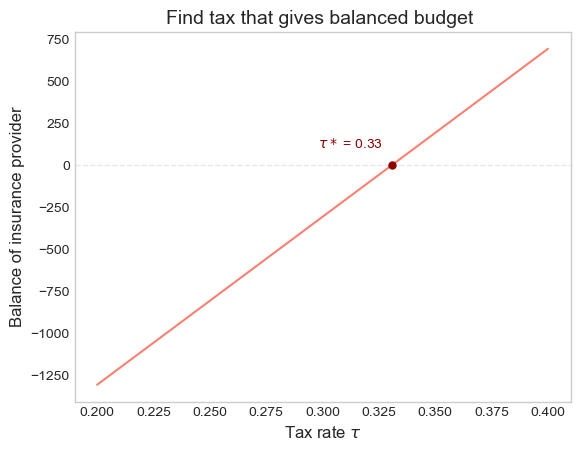

In [38]:
x = tax_grid
y = results_single_payer[0] 
f = interpolate.interp1d(x, y)

optimal_tax = fsolve(f, 0.33)  #0.0 is the starting point

plt.axhline(0, 0, 1, color='lightgray', linewidth=1, alpha=0.5,linestyle='dashed')
plt.plot(tax_grid,results_single_payer[0] , color = 'salmon')
plt.grid(b=None)
plt.title('Find tax that gives balanced budget ', fontsize=14)
plt.xlabel(r'Tax rate $\tau$', fontsize=12)
plt.ylabel('Balance of insurance provider', fontsize=12)
#ax.axvline(optimal_tax, 0, 0.51, color='cornflowerblue', linewidth=1)
plt.plot(optimal_tax, 0,'o',color='darkred', markersize=5)
plt.text(optimal_tax*0.9, 100 , r'$\tau*$ = {:.2f}'.format(optimal_tax[0]), color = 'darkred')
plt.savefig('optimal_tax.png')
plt.show()

In [36]:
x = tax_grid
y = results_single_payer[0] 
y

array([ 345.79591589, 2345.55992685])